#                                         Airbnb open

##  Importing Libraries and reading dataset 

In [210]:
from numpy import *
from pandas import *
from matplotlib import pyplot as plt
import seaborn as sns


In [211]:
data=read_csv(r"C:\Users\DELL\Documents\Python\Project four\Airbnb_Open_Data.csv",parse_dates=["last review"])

C:\Users\DELL\AppData\Local\Temp\ipykernel_12316\394010591.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  data=read_csv(r"C:\Users\DELL\Documents\Python\Project four\Airbnb_Open_Data.csv",parse_dates=["last review"])


## Cleaning the data

In [212]:
data.head(2)

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN


In [213]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102349 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102193 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

In [214]:
#Dropping unrequired columns
data=data.drop(columns=["license"])

In [216]:
#Filling missing values
data["house_rules"]=data["house_rules"].fillna("0")

In [217]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102349 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102193 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

In [218]:
#Dropping null values
data=data.dropna()

In [220]:
#Checking for duplicated values
data.duplicated().sum()

466

In [221]:
#Dropping duplicated values
data=data.drop_duplicates()

In [223]:
#Modifing data types
data["id"]=data["id"].astype("object")

In [225]:
data["host id"]=data["host id"].astype("object")

In [226]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83412 entries, 0 to 102040
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              83412 non-null  object        
 1   NAME                            83412 non-null  object        
 2   host id                         83412 non-null  object        
 3   host_identity_verified          83412 non-null  object        
 4   host name                       83412 non-null  object        
 5   neighbourhood group             83412 non-null  object        
 6   neighbourhood                   83412 non-null  object        
 7   lat                             83412 non-null  float64       
 8   long                            83412 non-null  float64       
 9   country                         83412 non-null  object        
 10  country code                    83412 non-null  object        
 11  i

In [227]:
data["Construction year"]

0         2020.0
1         2007.0
4         2009.0
5         2013.0
7         2009.0
           ...  
102029    2018.0
102030    2015.0
102031    2020.0
102032    2007.0
102040    2022.0
Name: Construction year, Length: 83412, dtype: float64

In [228]:
data["Construction year"]=to_datetime(data["Construction year"])

In [229]:
#data["Construction year"]=data["Construction year"].astype("datetime64[ns]")

In [230]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83412 entries, 0 to 102040
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              83412 non-null  object        
 1   NAME                            83412 non-null  object        
 2   host id                         83412 non-null  object        
 3   host_identity_verified          83412 non-null  object        
 4   host name                       83412 non-null  object        
 5   neighbourhood group             83412 non-null  object        
 6   neighbourhood                   83412 non-null  object        
 7   lat                             83412 non-null  float64       
 8   long                            83412 non-null  float64       
 9   country                         83412 non-null  object        
 10  country code                    83412 non-null  object        
 11  i

## Explaratory data analysis

In [231]:
data.describe()

,lat,long,price,service fee,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
count,83412.000000,83412.000000,83412.000000,83412.000000,83412.000000,83412.000000,83412.000000,83412.000000,83412.000000,83412.000000
mean,40.727354,-73.948500,626.219441,125.245049,7.405313,32.279037,1.377606,3.278797,7.032609,141.784995
std,0.056325,0.050347,331.790851,66.361709,28.102056,51.962067,1.751042,1.283606,29.551420,133.928159
min,40.504560,-74.249840,50.000000,10.000000,-365.000000,1.000000,0.010000,1.000000,1.000000,-10.000000
25%,40.687650,-73.982110,340.000000,68.000000,2.000000,3.000000,0.220000,2.000000,1.000000,6.000000
50%,40.721320,-73.953720,625.000000,125.000000,3.000000,11.000000,0.740000,3.000000,1.000000,101.000000
75%,40.762600,-73.930817,914.000000,183.000000,5.000000,38.000000,2.010000,4.000000,2.000000,266.000000
max,40.916970,-73.705220,1200.000000,240.000000,5645.000000,1024.000000,90.000000,5.000000,332.000000,3677.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x20f5cd74e80>,
 'caps': [<matplotlib.lines.Line2D at 0x20f5cd87460>,
 'boxes': [<matplotlib.lines.Line2D at 0x20f5cd74b80>],
 'medians': [<matplotlib.lines.Line2D at 0x20f5cd87a00>],
 'fliers': [<matplotlib.lines.Line2D at 0x20f5cd87cd0>],
 'means': []}

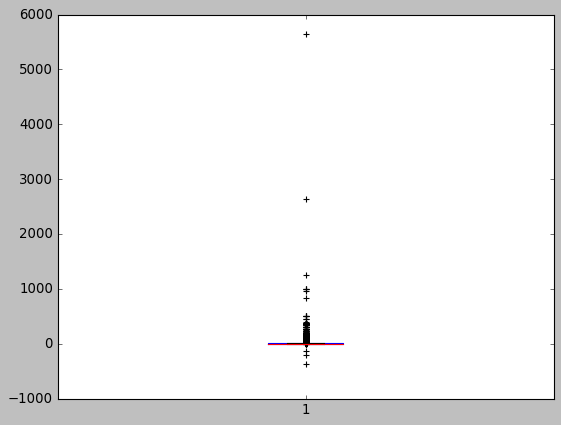

In [232]:
#Checking for outliers
plt.boxplot(data["minimum nights"])

In [233]:
data[data["minimum nights"]>365]["minimum nights"]=data["minimum nights"].mean()
data[data["minimum nights"]<0]["minimum nights"]=data["minimum nights"].mean()

C:\Users\DELL\AppData\Local\Temp\ipykernel_12316\2738470194.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[data["minimum nights"]>365]["minimum nights"]=data["minimum nights"].mean()
C:\Users\DELL\AppData\Local\Temp\ipykernel_12316\2738470194.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[data["minimum nights"]<0]["minimum nights"]=data["minimum nights"].mean()


{'whiskers': [<matplotlib.lines.Line2D at 0x20f5cf96e80>,
 'caps': [<matplotlib.lines.Line2D at 0x20f5cfa5460>,
 'boxes': [<matplotlib.lines.Line2D at 0x20f5cf96bb0>],
 'medians': [<matplotlib.lines.Line2D at 0x20f5cfa5a00>],
 'fliers': [<matplotlib.lines.Line2D at 0x20f5cfa5d00>],
 'means': []}

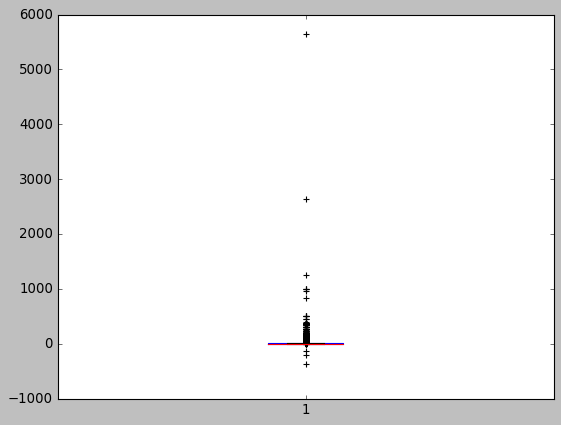

In [234]:
plt.boxplot(data["minimum nights"])

{'whiskers': [<matplotlib.lines.Line2D at 0x20f5d2049d0>,
 'caps': [<matplotlib.lines.Line2D at 0x20f5d204f70>,
 'boxes': [<matplotlib.lines.Line2D at 0x20f5d204700>],
 'medians': [<matplotlib.lines.Line2D at 0x20f5dac4550>],
 'fliers': [<matplotlib.lines.Line2D at 0x20f5dac4820>],
 'means': []}

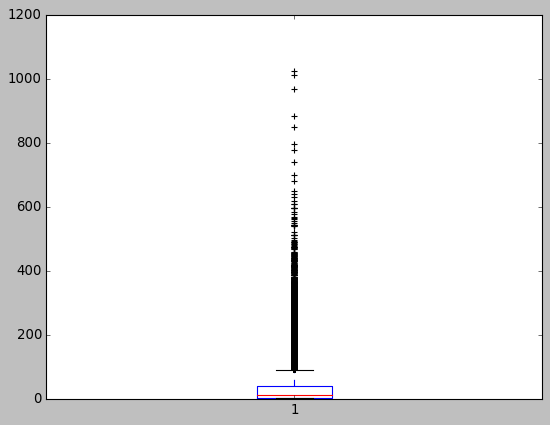

In [235]:
plt.boxplot(data["number of reviews"])

In [236]:
data[data["availability 365"]<0]["availability 365"]=data["availability 365"].mean()

C:\Users\DELL\AppData\Local\Temp\ipykernel_12316\4106754440.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[data["availability 365"]<0]["availability 365"]=data["availability 365"].mean()


In [237]:
data.describe()

,lat,long,price,service fee,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
count,83412.000000,83412.000000,83412.000000,83412.000000,83412.000000,83412.000000,83412.000000,83412.000000,83412.000000,83412.000000
mean,40.727354,-73.948500,626.219441,125.245049,7.405313,32.279037,1.377606,3.278797,7.032609,141.784995
std,0.056325,0.050347,331.790851,66.361709,28.102056,51.962067,1.751042,1.283606,29.551420,133.928159
min,40.504560,-74.249840,50.000000,10.000000,-365.000000,1.000000,0.010000,1.000000,1.000000,-10.000000
25%,40.687650,-73.982110,340.000000,68.000000,2.000000,3.000000,0.220000,2.000000,1.000000,6.000000
50%,40.721320,-73.953720,625.000000,125.000000,3.000000,11.000000,0.740000,3.000000,1.000000,101.000000
75%,40.762600,-73.930817,914.000000,183.000000,5.000000,38.000000,2.010000,4.000000,2.000000,266.000000
max,40.916970,-73.705220,1200.000000,240.000000,5645.000000,1024.000000,90.000000,5.000000,332.000000,3677.000000


In [254]:
#discovering the correlation between columns
X=data.corr()

<AxesSubplot:>

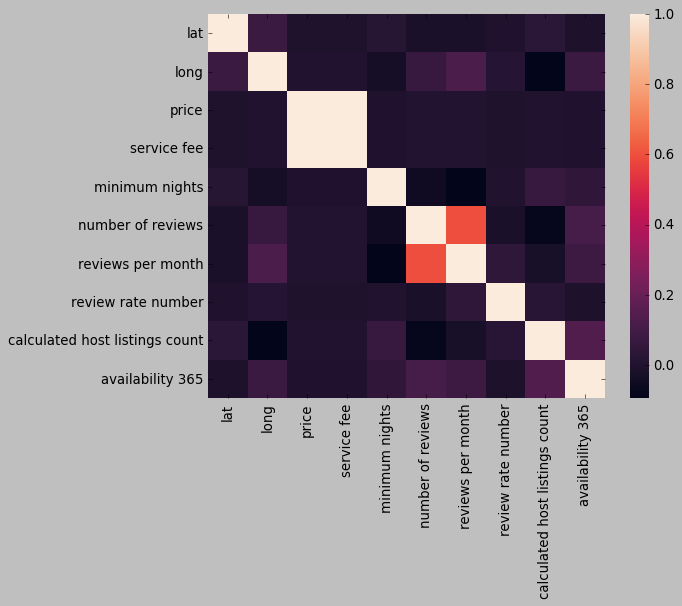

In [255]:
sns.heatmap(X)

In [239]:
data.nunique()

id                                83412
NAME                              50535
host id                           83412
host_identity_verified                2
host name                         11649
neighbourhood group                   6
neighbourhood                       223
lat                               20721
long                              16867
country                               1
country code                          1
instant_bookable                      2
cancellation_policy                   3
room type                             4
Construction year                    20
price                              1151
service fee                         231
minimum nights                      122
number of reviews                   469
last review                        2435
reviews per month                  1012
review rate number                    5
calculated host listings count       77
availability 365                    438
house_rules                        1953


Text(0, 0.5, 'Service fee')

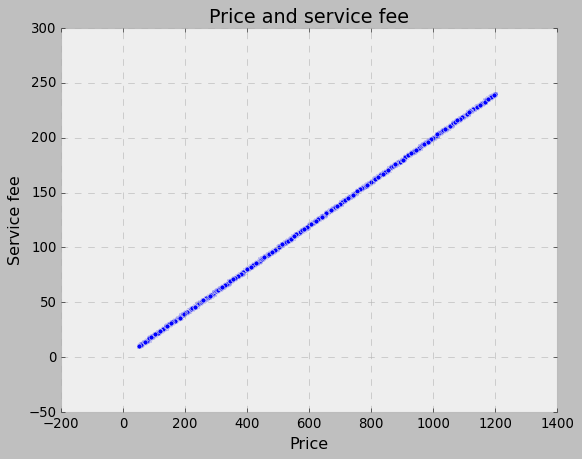

In [240]:
plt.style.use("bmh")
plt.scatter(data["price"],data["service fee"])
plt.title("Price and service fee")
plt.xlabel("Price")
plt.ylabel("Service fee")              # As the price increase the service fee increase

Text(0, 0.5, 'price')

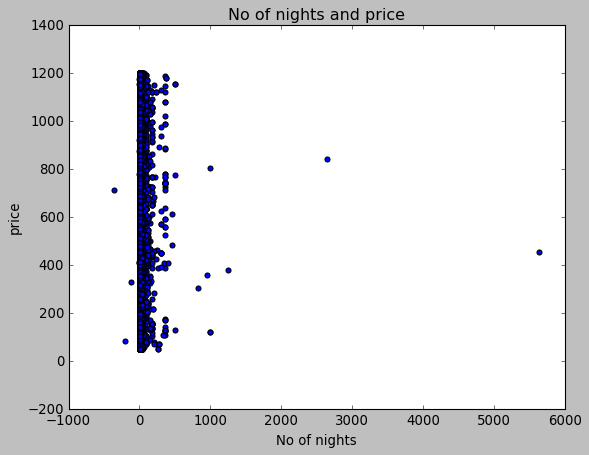

In [241]:
plt.style.use("classic")
plt.scatter(data["minimum nights"],data["price"])
plt.title("No of nights and price")
plt.xlabel("No of nights")
plt.ylabel("price")            # There is no relation between No of dayes and price

In [242]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83412 entries, 0 to 102040
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              83412 non-null  object        
 1   NAME                            83412 non-null  object        
 2   host id                         83412 non-null  object        
 3   host_identity_verified          83412 non-null  object        
 4   host name                       83412 non-null  object        
 5   neighbourhood group             83412 non-null  object        
 6   neighbourhood                   83412 non-null  object        
 7   lat                             83412 non-null  float64       
 8   long                            83412 non-null  float64       
 9   country                         83412 non-null  object        
 10  country code                    83412 non-null  object        
 11  i

In [243]:
A=data.groupby("neighbourhood group").mean()["number of reviews"].to_frame().sort_values(by="number of reviews",ascending=False)
A

,number of reviews
neighbourhood group,
brookln,167.000000
Staten Island,39.006127
Queens,38.889448
Bronx,36.253198
Brooklyn,32.978952
Manhattan,29.026731


Text(0, 0.5, 'No of reviews')

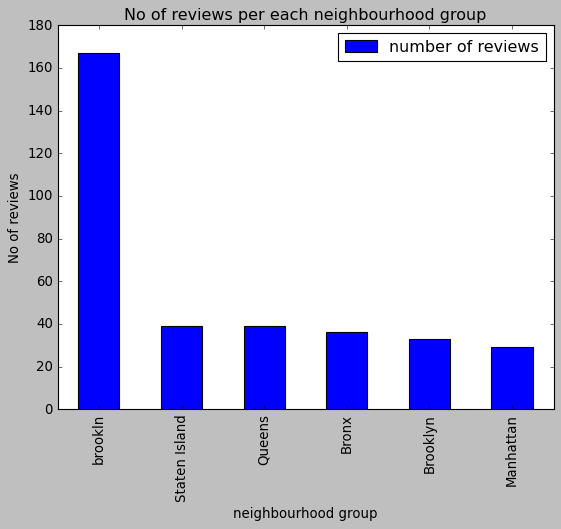

In [244]:
A.plot(kind="bar")
plt.title("No of reviews per each neighbourhood group")
plt.ylabel("No of reviews")

In [250]:
B=data.groupby("room type").mean()["price"].to_frame().sort_values(by="price",ascending=False)
B

,price
room type,
Hotel room,657.953704
Shared room,629.996962
Private room,627.749667
Entire home/apt,624.701929


Text(0.5, 1.0, 'Avg price of each room type')

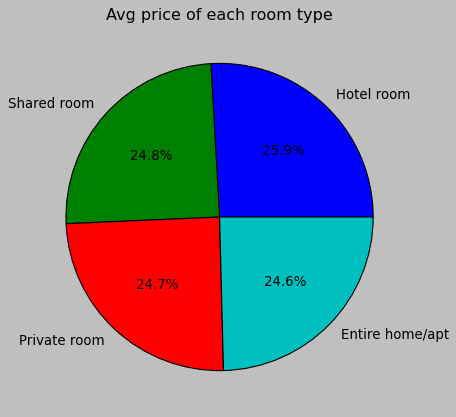

In [258]:
plt.pie(B["price"],labels=B.index,autopct="%1.1f%%")
plt.title("Avg price of each room type")

Text(0.5, 1.0, 'Availability of each room type')

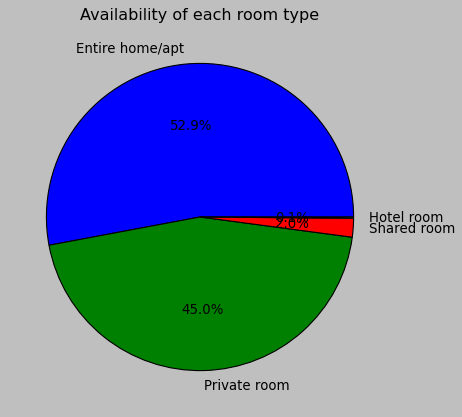

In [266]:
B=data.groupby("room type").count()["price"].to_frame().sort_values(by="price",ascending=False)
plt.pie(B["price"],labels=B.index,autopct="%1.1f%%")
plt.title("Availability of each room type")

In [267]:
data.nunique()

id                                83412
NAME                              50535
host id                           83412
host_identity_verified                2
host name                         11649
neighbourhood group                   6
neighbourhood                       223
lat                               20721
long                              16867
country                               1
country code                          1
instant_bookable                      2
cancellation_policy                   3
room type                             4
Construction year                    20
price                              1151
service fee                         231
minimum nights                      122
number of reviews                   469
last review                        2435
reviews per month                  1012
review rate number                    5
calculated host listings count       77
availability 365                    438
house_rules                        1953


In [272]:
data.groupby("cancellation_policy").count()["price"].to_frame("Availability").sort_values(by="Availability",ascending=False)

,Availability
cancellation_policy,
moderate,27949
strict,27769
flexible,27694


In [275]:
C=data.groupby("Construction year").mean()["price"].to_frame().sort_values(by="price",ascending=False)
C

,price
Construction year,
1970-01-01 00:00:00.000002008,638.469956
1970-01-01 00:00:00.000002017,634.077311
1970-01-01 00:00:00.000002004,633.108207
1970-01-01 00:00:00.000002014,632.001642
1970-01-01 00:00:00.000002006,631.291773
1970-01-01 00:00:00.000002021,630.543868
1970-01-01 00:00:00.000002022,630.516238
1970-01-01 00:00:00.000002011,629.740910
1970-01-01 00:00:00.000002007,629.062274


Text(0.5, 1.0, 'Construction year and price')

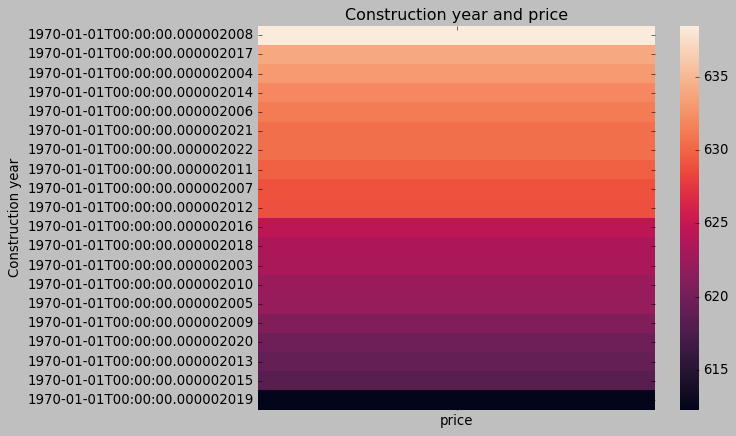

In [278]:
sns.heatmap(C)
plt.title("Construction year and price")

In [280]:
data.to_csv(r"C:\Users\DELL\Documents\Python\Project four\Clean_data.csv")